In [15]:
import numpy as np
import os
import cv2
import pickle
import tensorflow as tf
from tensorflow.python.keras.backend import learning_phase
import matplotlib.pyplot as plt

In [16]:
def loadData(path="../output"):
    '''
    Loads the data to be used by the classifiers
    '''
    pickle_in = open(path+"/X.pickle", "rb")
    X = pickle.load(pickle_in)
    pickle_in = open(path+"/y.pickle", "rb")
    y = pickle.load(pickle_in)
    pickle_in = open(path+"/data.pickle", "rb")
    data = pickle.load(pickle_in)

    return X,y,data

In [17]:
X,y,_ = loadData()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [18]:
model = tf.keras.models.load_model('../output/model')

In [19]:
results = model.evaluate(np.asarray(X_test),np.asarray(y_test))
print(results)

9/9 [==============================] - 1s 59ms/step - loss: 0.2606 - sparse_categorical_accuracy: 0.9382 - accuracy: 0.9382
[0.26063621044158936, 0.9382239580154419, 0.9382239580154419]


In [20]:
to_predict = []
for c in range(13):
    coin = np.asarray(cv2.imread("../images/coin{}.png".format(c)))
    #coin = cv2.cvtColor(coin, cv2.COLOR_BGR2RGB)
    coin = cv2.resize(coin, (128,128))
    #print(coin.shape)
    to_predict.append(coin)

Is: 
5c


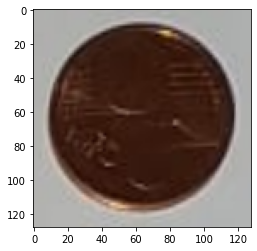

20c


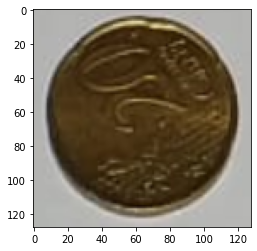

5c


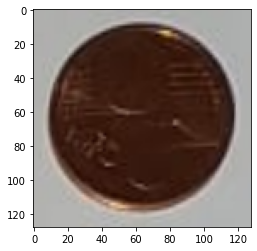

1e


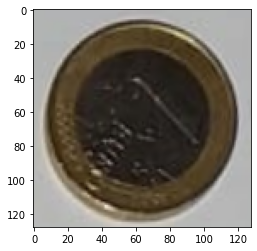

20c


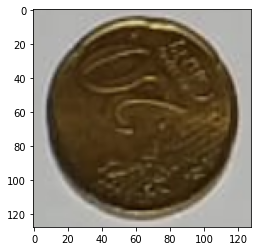

20c


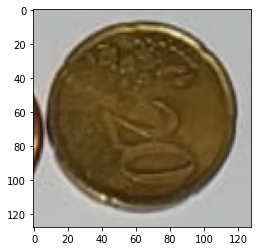

5c


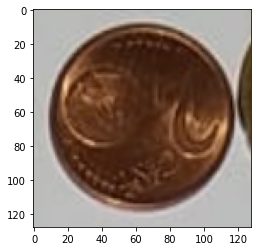

20c


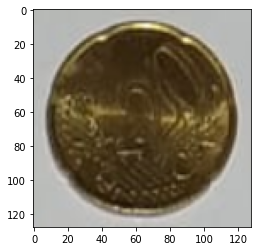

5c


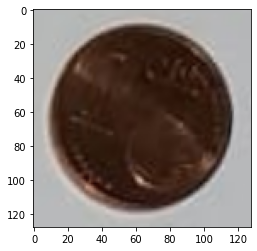

10c


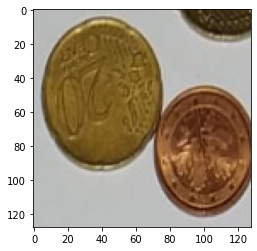

5c


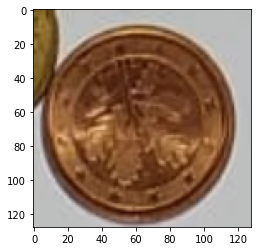

5c


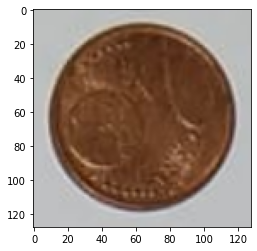

5c


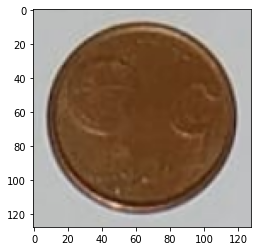

In [21]:
predictions = model.predict(np.asarray(to_predict))
result = [np.where(predictions[i] == np.amax(predictions[i]))[0][0] for i in range(len(predictions))]
CATEGORIES = ['1c', '1e', '2c','2e','5c','10c','20c','50c']  
print("Is: ")
for id,i in enumerate(result):
    print(CATEGORIES[i])    
    coin = to_predict[id]
    plt.imshow(cv2.cvtColor(coin, cv2.COLOR_BGR2RGB))
    plt.show()
